In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # tqdm是显示循环进度条的库


class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  # 记录当前智能体位置的横坐标
        self.y = self.nrow - 1  # 记录当前智能体位置的纵坐标

    def step(self, action):  # 外部调用这个函数来改变当前位置
        # 4种动作, change[0]:上, change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  # 下一个位置在悬崖或者目标
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  # 回归初始状态,坐标轴原点在左上角
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x

In [2]:
class Sarsa:
    
    def __init__(self,ncol,nrow,epsilon,alpha,gamma,n_action=4):
        self.Q_table = np.zeros([nrow*ncol,n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    
    def take_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    
    def best_action(self,state):
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state,i] == Q_max:
                a[i] = 1
        return a
    
    def update(self,s0,a0,r,s1,a1):
        td_error = r + self.gamma * self.Q_table[s1,a1] - self.Q_table[s0,a0]
        self.Q_table[s0,a0] += self.alpha * td_error

In [3]:
ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = Sarsa(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

In [7]:
return_list = []

In [8]:
for i in range(10):
    
    with tqdm(total=int(num_episodes/10),desc='i %d' % i) as pbar:
        
        for i_episode in range(int(num_episodes/10)):
            
            episode_return = 0
            state = env.reset()
            action = agent.take_action(state)
            done = False
            while not done:
                next_state,reward,done = env.step(action)
                next_action = agent.take_action(next_state)
                episode_return += reward
                agent.update(state,action,reward,next_state,next_action)
                state = next_state
                action = next_action
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix(
                  {
                      'episode':'%d' % (num_episodes/10*i+i_episode+1),
                      'return': '%.3f' % np.mean(return_list[-10:])
                  }
                )
            pbar.update(1)

i 0: 100%|█| 50/50 [00:00<00:00, 1789.10it/s, episode=50, return=-119.400
i 1: 100%|█| 50/50 [00:00<00:00, 3530.08it/s, episode=100, return=-63.000
i 2: 100%|█| 50/50 [00:00<00:00, 5156.13it/s, episode=150, return=-51.200
i 3: 100%|█| 50/50 [00:00<00:00, 7425.12it/s, episode=200, return=-48.100
i 4: 100%|█| 50/50 [00:00<00:00, 6866.90it/s, episode=250, return=-35.700
i 5: 100%|█| 50/50 [00:00<00:00, 8103.68it/s, episode=300, return=-29.900
i 6: 100%|█| 50/50 [00:00<00:00, 9530.78it/s, episode=350, return=-28.300
i 7: 100%|█| 50/50 [00:00<00:00, 10796.71it/s, episode=400, return=-27.70
i 8: 100%|█| 50/50 [00:00<00:00, 9659.84it/s, episode=450, return=-28.500
i 9: 100%|█| 50/50 [00:00<00:00, 8895.28it/s, episode=500, return=-18.900


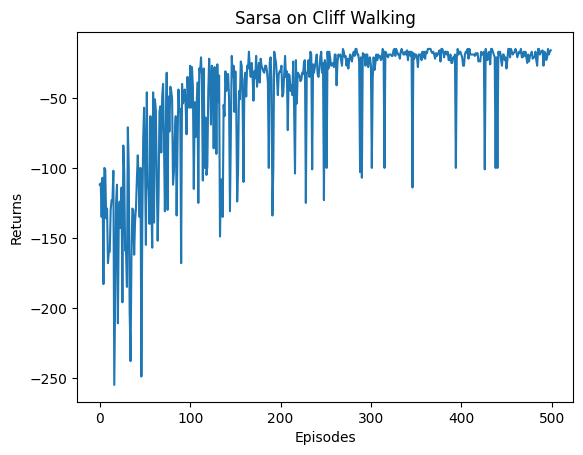

In [9]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Sarsa on {}'.format('Cliff Walking'))
plt.show()

In [10]:
def print_agent(agent, env, action_meaning, disaster=[], end=[]):
    for i in range(env.nrow):
        for j in range(env.ncol):
            if (i * env.ncol + j) in disaster:
                print('****', end=' ')
            elif (i * env.ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent.best_action(i * env.ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['^', 'v', '<', '>']
print('Sarsa算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])

Sarsa算法最终收敛得到的策略为：
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo ooo> ^ooo ooo> ooo> ooo> ooo> ^ooo ^ooo ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [11]:
class Sarsa:
    
    def __init__(self,ncol,nrow,epsilon,alpha,gamma,n_action=4):
        self.Q_table = np.zeros([nrow*ncol,n_action])
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
    
    def take_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    
    def best_action(self,state):
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state,i] == Q_max:
                a[i] = 1
        return a
    
    def update(self,s0,a0,r,s1):
        td_error = r + self.gamma * self.Q_table[s1].max() - self.Q_table[s0,a0]
        self.Q_table[s0,a0] += self.alpha * td_error

In [12]:
ncol = 12
nrow = 4
env = CliffWalkingEnv(ncol, nrow)
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
agent = Sarsa(ncol, nrow, epsilon, alpha, gamma)
num_episodes = 500  # 智能体在环境中运行的序列的数量

In [14]:
return_list = []
for i in range(10):
    
    with tqdm(total=int(num_episodes/10),desc='i %d' % i) as pbar:
        
        for i_episode in range(int(num_episodes/10)):
            
            episode_return = 0
            state = env.reset()
            done = False
            while not done:
                action = agent.take_action(state)
                next_state,reward,done = env.step(action)
                episode_return += reward
                agent.update(state,action,reward,next_state)
                state = next_state
                action = next_action
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix(
                  {
                      'episode':'%d' % (num_episodes/10*i+i_episode+1),
                      'return': '%.3f' % np.mean(return_list[-10:])
                  }
                )
            pbar.update(1)

i 0: 100%|█| 50/50 [00:00<00:00, 1895.88it/s, episode=50, return=-110.000
i 1: 100%|█| 50/50 [00:00<00:00, 3221.23it/s, episode=100, return=-72.700
i 2: 100%|█| 50/50 [00:00<00:00, 4294.36it/s, episode=150, return=-51.700
i 3: 100%|█| 50/50 [00:00<00:00, 6135.07it/s, episode=200, return=-54.700
i 4: 100%|█| 50/50 [00:00<00:00, 6634.04it/s, episode=250, return=-42.400
i 5: 100%|█| 50/50 [00:00<00:00, 6874.78it/s, episode=300, return=-31.300
i 6: 100%|█| 50/50 [00:00<00:00, 8308.18it/s, episode=350, return=-37.000
i 7: 100%|█| 50/50 [00:00<00:00, 9375.68it/s, episode=400, return=-25.500
i 8: 100%|█| 50/50 [00:00<00:00, 10038.06it/s, episode=450, return=-32.10
i 9: 100%|█| 50/50 [00:00<00:00, 1452.69it/s, episode=500, return=-42.500


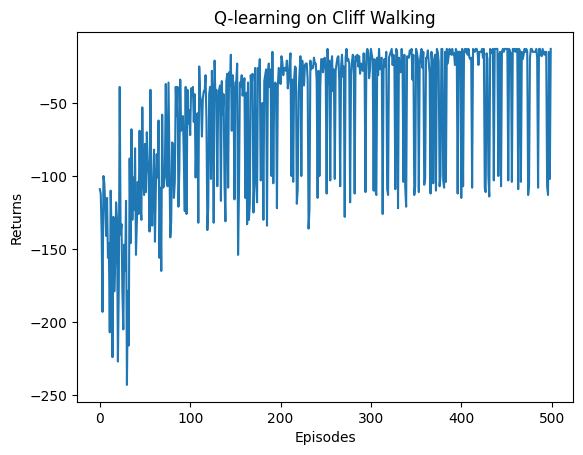

Q-learning算法最终收敛得到的策略为：
ovoo ovoo ovoo oo<o ooo> ooo> ovoo ^ooo oo<o ooo> ooo> oo<o 
^ooo ooo> ooo> ^ooo ^ooo oo<o ooo> ooo> ooo> ovoo ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [15]:

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning on {}'.format('Cliff Walking'))
plt.show()

action_meaning = ['^', 'v', '<', '>']
print('Q-learning算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])